#  **Microsoft Movie Studio - Technical Summary**
Authors: Stu Murphy and Nicole Bills

Date: 10/23/19

Data source: The Numbers (Movie budgets and worldwide gross) & IMDB (genres)

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *

In [28]:
# import raw data files
df_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
df_basics = pd.read_csv('data/imdb.title.basics.csv.gz')

# Report - Opportunity Analysis

Goal:  develop a strategy for Microsoft to create a successful movie studio based on return on investment (ROI)

Results:    Microsoft should focus its efforts on [this kind of movie]
- The most important features to predict movie success based on [the criteria defined above] are 1.) 2.) 3.)

In [29]:
# possible visualization: heat map of success by feature

### Assumptions
ROI is the best metric to achieve our objective. Our definition of ROI is technically ‘Net Revenue’ and we have chosen this metric for the following reasons:
1.	Microsoft is a publicly traded company: The company’s valuation is based off of quarterly earnings (earnings per share) and not profit margin. We also recognize that Microsoft wants their new movie studio to be profitable, therefore using total sales or gross revenue would be meaningless.
2.	Context: We do not want to assume that Microsoft will be as immediately as profitable as their competitors, when entering a new market. We should assume the company will incur higher production and operational costs due to initial capex and operational inefficiencies.
3.	Perception are important at an early stage. Headlines with large box office earnings (not profits) are advantageous when establishing yourself in a new vertical around strong competition.

### Methodology
1.	Feature Selection
    -	Identifying Net Revenue (ROI) as our target variable and selecting ‘Genre’ as our subject for exploration.
2.	Data Cleaning
    -	Transformation (str) to (int)
    -	Drop outliers
3.	Feature Engineering
    -	New feature creation (ROI)
    -	Sort Values
    -	Reset Index
    -	Merge Datasets
    -	Drop Missing Values
4.	Exploratory Analysis & Visualization
    -	Central Tendency
    -	Distribution Plots
    -	Quintile Comparisons

### Data Preparation

In [30]:
# Start with 'budgets' dataset. Transform dollar amounts (str) into integers:
# Step 1. Strip out $ signs.
df_budgets = df_budgets.applymap(lambda x: str(x).replace('$', '')) 


In [31]:
# Step 2. Strip away ','.
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].map(lambda x: str(x).replace(',', '_'))
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].map(lambda x: str(x).replace(',', '_'))
df_budgets['production_budget'] = df_budgets['production_budget'].map(lambda x: str(x).replace(',', '_'))


In [32]:
# Step 3. Transform string values into integers.
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].astype(int)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].astype(int)
df_budgets['production_budget'] = df_budgets['production_budget'].astype(int)


In [33]:
# Create a new variable 'worldwide_roi' by calculating ROI.
df_budgets['worldwide_roi'] = (df_budgets['worldwide_gross'] / df_budgets['production_budget']) *100


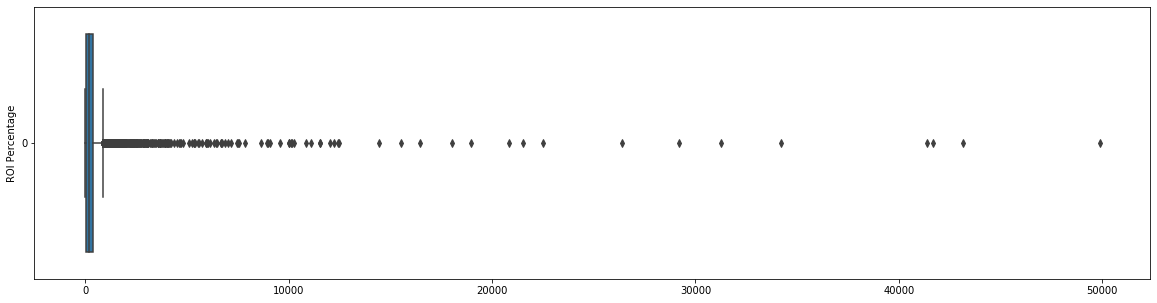

In [71]:
# Understanding our data ROI data distribution - identify skewness & potential outliers.
df_budgets['worldwide_roi'].describe()
plt.figure(figsize=(20,5));
sns.boxplot(data=df_budgets['worldwide_roi'], orient='h').set(ylabel="ROI Percentage");


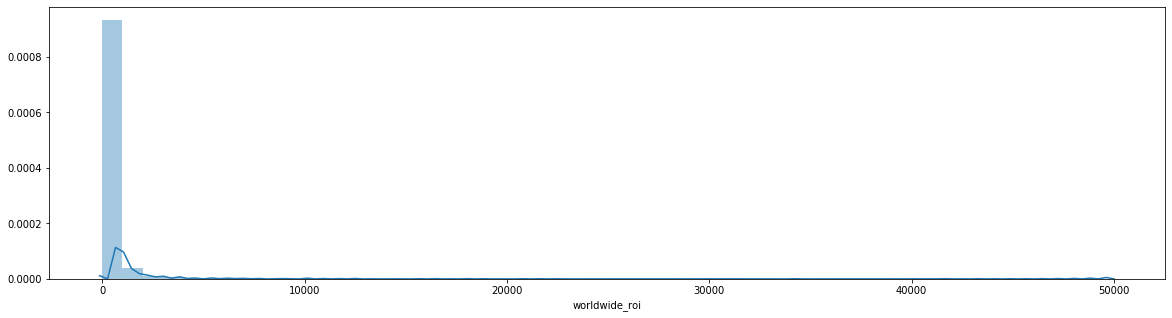

In [56]:
# And a distribution plot too...
plt.figure(figsize=(20,5));
sns.distplot(df_budgets['worldwide_roi']);

In [57]:
# Sort dataframe by ROI, starting with highest ROI.
df_budgets.sort_values('worldwide_roi', ascending=False, inplace=True)


In [58]:
# There is one huge outlier that is in a category we can assume our client doesn't want to enter. Drop it.
df_budgets.drop(5745, axis=0, inplace=True)


In [59]:
# Reset our index, because we have removed an outlier and sorted our data.
df_budgets.reset_index(inplace=True)
df_budgets.drop('index', axis=1, inplace=True)


In [61]:
# Create a new variable 'roi_category' to classify levels of ROI (based on quintiles).
names = ['low', 'somewhat low', 'moderate', 'somewhat high', 'high']
pd.qcut(df_budgets['worldwide_roi'], 5, labels=names)
df_budgets['roi_category'] = pd.qcut(df_budgets['worldwide_roi'], 5, labels=names)


In [62]:
# Create a new variable 'movie_year' within both 'budgets' and 'basics' datasets which we can use to merge.
df_budgets['movie_year'] = df_budgets['movie']+" (" + df_budgets['release_date'].map(lambda x: x[-4: len(x)])+")"
df_basics['movie_year'] = df_basics['primary_title']+" (" + df_basics['start_year'].astype(str)+")"

In [72]:
# Merge (left) 'basics' data to our 'budgets' dataset on 'movie_year' that we created in the both datasets.
df_merged_data = df_budgets.merge(df_basics, how='left', on='movie_year')


In [44]:
# Check for missing values & NaN.
df_merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5844 entries, 0 to 5843
Data columns (total 15 columns):
id                   5844 non-null object
release_date         5844 non-null object
movie                5844 non-null object
production_budget    5844 non-null int64
domestic_gross       5844 non-null int64
worldwide_gross      5844 non-null int64
worldwide_roi        5844 non-null float64
roi_category         5844 non-null category
movie_year           5844 non-null object
tconst               1545 non-null object
primary_title        1545 non-null object
original_title       1545 non-null object
start_year           1545 non-null float64
runtime_minutes      1519 non-null float64
genres               1539 non-null object
dtypes: category(1), float64(3), int64(3), object(8)
memory usage: 690.7+ KB


In [64]:
# Create a new dataset, dropping all the rows with misssing values.
df_fulldata = df_merged_data.loc[~df_merged_data.isna().any(axis=1)]
df_fulldata.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015),tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller"
25,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10175.949000,high,The Devil Inside (2012),tt1560985,The Devil Inside,The Devil Inside,2012.0,83.0,Horror
51,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5917.067733,high,Paranormal Activity 2 (2010),tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010.0,91.0,Horror
59,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,high,Get Out (2017),tt5052448,Get Out,Get Out,2017.0,104.0,"Horror,Mystery,Thriller"
65,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,4349.700800,high,Moonlight (2016),tt4975722,Moonlight,Moonlight,2016.0,111.0,Drama


In [65]:
# Check to see that dataset is complete and ready for analysis.
df_fulldata.info()
df_fulldata.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 2 to 5842
Data columns (total 15 columns):
id                   1517 non-null object
release_date         1517 non-null object
movie                1517 non-null object
production_budget    1517 non-null int64
domestic_gross       1517 non-null int64
worldwide_gross      1517 non-null int64
worldwide_roi        1517 non-null float64
roi_category         1517 non-null category
movie_year           1517 non-null object
tconst               1517 non-null object
primary_title        1517 non-null object
original_title       1517 non-null object
start_year           1517 non-null float64
runtime_minutes      1517 non-null float64
genres               1517 non-null object
dtypes: category(1), float64(3), int64(3), object(8)
memory usage: 179.5+ KB


,production_budget,domestic_gross,worldwide_gross,worldwide_roi,start_year,runtime_minutes
count,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,4.458150e+07,5.636836e+07,1.413037e+08,367.577120,2013.858932,106.751483
std,5.615790e+07,8.479596e+07,2.340826e+08,1199.006065,2.555429,19.114454
min,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,2010.000000,4.000000
25%,8.000000e+06,3.047539e+06,8.004221e+06,72.365130,2012.000000,94.000000
50%,2.250000e+07,2.774096e+07,5.169536e+07,211.655794,2014.000000,105.000000
75%,5.500000e+07,6.763116e+07,1.589053e+08,397.540927,2016.000000,118.000000
max,4.106000e+08,7.000596e+08,2.048134e+09,41656.474000,2019.000000,180.000000


In [66]:
# Resetting index to 'id' column.
df_fulldata.set_index("id", inplace=True)


In [67]:
# Save new dataset as a csv.
df_fulldata.to_csv('cleaned_data.csv')


### Analysis

In [ ]:
# possible visualization: boxplot of degree of success by feature

In [ ]:
# possible visualizations: pairplots showing correlation

In [11]:
# possible visualization: bar charts showing most successful and least successful films

### Recommendations
1.	Client should target high ROI, low-risk genres such as Animation, Sci-Fi and Adventure.  In the past, the combination of Action/Adventure/Animation has yielded high-return films.
2.	Client should seek concepts/titles than have significant potential for serialization within high ROI genres (potentially look to comics or multi-novel series).
3.	Client should carefully evaluate projects in the Mystery and Horror genres.  Historical data indicates that Horror/Mystery/Thrillers and Drama/Horror/ Mystery represent high risk, high reward opportunities.
4.	Client should avoid Biography, Drama, and Crime genres, given their relatively low ROI.


### Areas for Further Analysis
 - Within target genres, are there key players (i.e. director, producer, screenwriters) to involve in production?